In [66]:
import json
from glob import glob
template = json.load(open("tests/template/metadata.json"))
import numpy as np
import pandas as pd
from copy import deepcopy
import os
import shutil
from pathlib import Path

count = 14
output_folder = Path('tests/fixtures')
image1_src = Path('tests/template/lst.png')
image2_src = Path('tests/template/rgb.png')


def generate_floats(median, std, count):
    return np.random.normal(loc=median, scale=std, size=count).round(2).tolist()

def generate_dates(dates, count):
    indexes = np.sort(np.random.randint(0, len(dates), count))
    return [i.isoformat() for i in dates[np.random.randint(0, len(dates), count)]]


requested = {
    'scene_datetime': generate_dates(pd.date_range(start='2022-07-01', end='2022-09-30'), count),
    'cloud_cover': generate_floats(20, 4, count),
    'no_data': generate_floats(30, 3, count),
    'lst_median': generate_floats(20.0, 4.0, count),
    'lst_min': generate_floats(5.0, 6.0, count),
    'lst_max': generate_floats(30.0, 8.0, count)
}

if os.path.exists('tests/fixtures'):
    shutil.rmtree('tests/fixtures')

out = []
for i in range(count):
    metadata = deepcopy(template)
    metadata.update({k: v[i] for k, v in requested.items()})

    i_output_folder = output_folder / ("img" + str(i))
    json_file_path = i_output_folder / 'metadata.json'
    image1_dst = i_output_folder / image1_src.name
    image2_dst = i_output_folder / image2_src.name

    i_output_folder.mkdir(parents=True, exist_ok=True)

    with open(json_file_path, 'w') as json_file:
        json.dump(metadata, json_file)

    shutil.copy(image1_src, image1_dst)
    shutil.copy(image2_src, image2_dst)

(array([  3.,  29.,  88., 188., 254., 259., 130.,  38.,   9.,   2.]),
 array([ 6.55886848,  9.37948702, 12.20010556, 15.0207241 , 17.84134264,
        20.66196118, 23.48257973, 26.30319827, 29.12381681, 31.94443535,
        34.76505389]),
 <BarContainer object of 10 artists>)

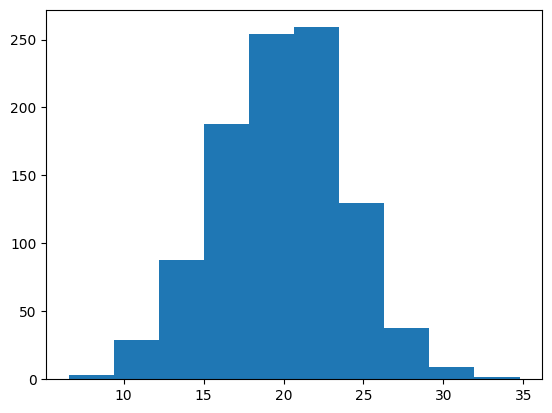

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Gaussian distribution
mean = 20  # Mean of the distribution
std_dev = 4  # Standard deviation of the distribution
size = 1000  # Number of values to generate

# Generate the values
plt.hist(np.random.normal(loc=mean, scale=std_dev, size=size))

In [4]:
glob("tests/fixtures/*")

['tests/fixtures/img1',
 'tests/fixtures/img4',
 'tests/fixtures/img3',
 'tests/fixtures/img2']

In [1]:
import altair as alt
import pandas as pd
import numpy as np

# Example data
data = pd.DataFrame({
    'scene_datetime': pd.date_range(start='1/1/2022', periods=100),
    'count': np.random.randint(0, 100, size=100),
    'category': np.random.choice(['A', 'B'], size=100)  # Two categories for different histograms
})

# Create the first histogram for category A
hist_a = alt.Chart(data[data['category'] == 'A']).mark_bar(color='blue', opacity=0.5).encode(
    x=alt.X('scene_datetime:T', title=''),
    y=alt.Y('count:Q', title=''),
    tooltip=['scene_datetime', 'count']
).properties(height=200, width=600)

# Create the second histogram for category B
hist_b = alt.Chart(data[data['category'] == 'B']).mark_bar(color='orange', opacity=0.5).encode(
    x=alt.X('scene_datetime:T', title=''),
    y=alt.Y('count:Q', title=''),
    tooltip=['scene_datetime', 'count']
).properties(height=200, width=600)

# Overlay the two histograms
overlay = alt.layer(hist_a, hist_b).configure_axisY(grid=False, labels=False)

overlay


alt.LayerChart(...)

In [3]:
data["category"].map({"A": "AA"})

0     NaN
1     NaN
2     NaN
3      AA
4     NaN
     ... 
95    NaN
96     AA
97    NaN
98     AA
99     AA
Name: category, Length: 100, dtype: object

In [ ]:
import altair as alt
import numpy as np
import pandas as pd

data = np.random.normal(size=1000)*10
source1 = pd.DataFrame({"v": data})

hist_a = alt.Chart(source1).mark_bar(color='blue', opacity=0.3).encode(
    alt.X("v:Q", bin=alt.Bin(maxbins=20)),
    y='count()',
)

source2 = pd.DataFrame({"v": data[:100]})

hist_b = alt.Chart(source2).mark_bar(color='blue', opacity=1).encode(
    alt.X("v:Q", bin=alt.Bin(maxbins=20)),
    y='count()',
)
overlay = alt.layer(hist_a, hist_b).configure_axisY(grid=False, labels=False)

overlay

In [24]:
# creating data 
df = pd.DataFrame({'A': np.random.normal(-1, 1, 1000), 
                   'B': np.random.normal(0, 1, 1000)}) 
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 4, 4],
    'B': [np.nan, 2, 3, 4, 4, np.nan],
})
  
# Overlapping Histograms 
alt.Chart(pd.melt(df, 
                  id_vars=df.index.name, 
                  value_vars=df.columns, 
                  var_name='Columns', 
                  value_name='Values') 
          ).mark_bar().encode( 
    alt.X('Values', bin=True), 
    alt.Y('count()', stack=None), 
    alt.Color('Columns') 
)

alt.Chart(...)

In [25]:
pd.melt(df, 
                  id_vars=df.index.name, 
                  value_vars=df.columns, 
                  var_name='Columns', 
                  value_name='Values') 
          

,Columns,Values
0,A,1.0
1,A,2.0
2,A,3.0
3,A,4.0
4,A,4.0
5,A,4.0
6,B,NaN
7,B,2.0
8,B,3.0
9,B,4.0


In [6]:
import pandas as pd
import altair as alt
import numpy as np
np.random.seed(42)

# Generating Data
source = pd.DataFrame({
    'A': [1, 2, 3, 4, 4, 4],
    'B': [np.nan, 2, 3, 4, 4, np.nan],
})

alt.Chart(source).transform_fold(
    ['A', 'B'],
    as_=['Experiment', 'Measurement']
).mark_bar(
    opacity=0.3,
    binSpacing=0
).encode(
    alt.X('Measurement:Q'),
    alt.Y('count()', stack=None),
    alt.Color('Experiment:N')
)

alt.Chart(...)

/Users/jonasberhin/Documents/product-qc-ui/.venv/lib/python3.12/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

In [8]:
pd.melt(df, 
                  id_vars=df.index.name, 
                  value_vars=df.columns, 
                  var_name='Columns', 
                  value_name='Values') 

,Columns,Values
0,Col A,-0.503286
1,Col A,-1.138264
2,Col A,-0.352311
3,Col A,0.523030
4,Col A,-1.234153
...,...,...
1995,Col B,1.070150
1996,Col B,-0.026521
1997,Col B,-0.881875
1998,Col B,-0.163067
